In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("diamonds.csv")

In [5]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [6]:
df.shape

(53940, 10)

In [7]:
# Renaming columns
df.rename(columns={'x':'length', 'y':'width', 'z':'depth', 'depth':'depth%'}, inplace = True)

In [8]:
# Creating Target column seperately to concat it at the end of the columns
df_target = df[['price']]
df_target.head(3)

,price
0,326
1,326
2,327


In [9]:
# Dropping the Target column
df = df.drop('price', axis = 1)
df.head(3)

,carat,cut,color,clarity,depth%,table,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31


In [10]:
# Concating Target column at the end of the columns
df = pd.concat([df, df_target], axis = 1)
df.head(3)

,carat,cut,color,clarity,depth%,table,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327


# EDA

In [12]:
df.describe()

,carat,depth%,table,length,width,depth,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [13]:
# There are missing values assigned as 0 in columns
df[['length','width','depth']][(df['length']==0) | (df['width']==0) | (df['depth']==0)]

,length,width,depth
2207,6.55,6.48,0.0
2314,6.66,6.60,0.0
4791,6.50,6.47,0.0
5471,6.50,6.47,0.0
10167,7.15,7.04,0.0
11182,0.00,6.62,0.0
11963,0.00,0.00,0.0
13601,6.88,6.83,0.0
15951,0.00,0.00,0.0
24394,8.49,8.45,0.0


In [14]:
# Replacing 0 (missing values) with Null values (np.NaN).
df[['length','width','depth']] = df[['length','width','depth']].replace(0, np.NaN)

In [15]:
# Checking Null Values
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth%      0
table       0
length      8
width       7
depth      20
price       0
dtype: int64

In [16]:
# Dropping Null Values
df.dropna(inplace = True)

In [17]:
# Rechecking Null Values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth%     0
table      0
length     0
width      0
depth      0
price      0
dtype: int64

In [18]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth%   53920 non-null  float64
 5   table    53920 non-null  float64
 6   length   53920 non-null  float64
 7   width    53920 non-null  float64
 8   depth    53920 non-null  float64
 9   price    53920 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [19]:
# Shape of data
df.shape

(53920, 10)

# Univariate Analysis on Continuous Variables :

<AxesSubplot:>

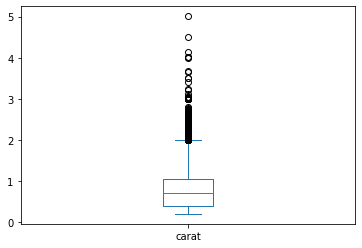

In [20]:
# Carat Column
df['carat'].plot.box()

<AxesSubplot:>

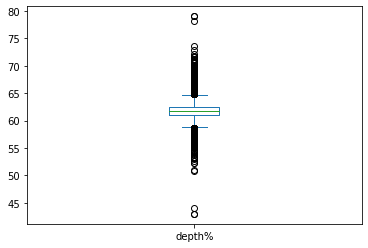

In [21]:
# Depth% Column
df['depth%'].plot.box()

<AxesSubplot:>

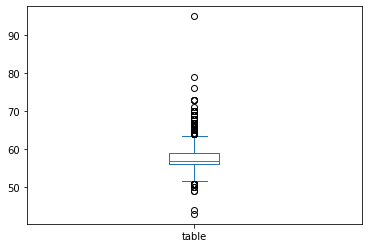

In [22]:
# Table Column
df['table'].plot.box()

<AxesSubplot:>

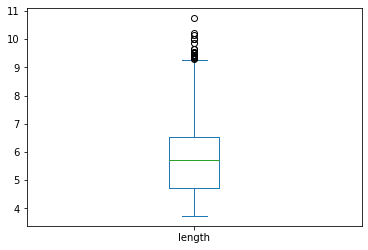

In [23]:
# Length Column
df['length'].plot.box()

<AxesSubplot:>

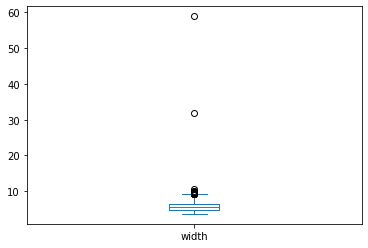

In [24]:
# Width Column
df['width'].plot.box()

<AxesSubplot:>

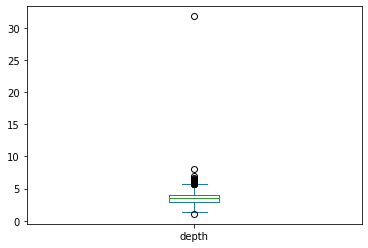

In [25]:
# Depth Column
df['depth'].plot.box()

<AxesSubplot:>

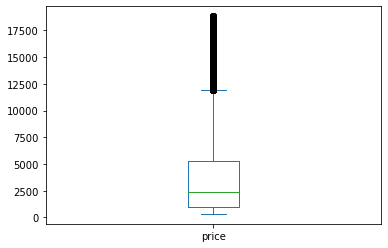

In [26]:
# Price Column
df['price'].plot.box()

# Univariate Analysis on Categorical Variables :

<AxesSubplot:>

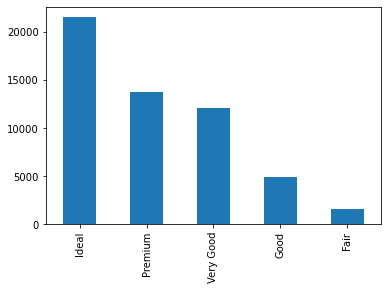

In [27]:
# BARPLOT for CUT
df['cut'].value_counts().plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

<AxesSubplot:>

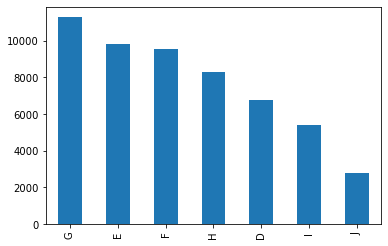

In [28]:
# BARPLOT for COLOR
df['color'].value_counts().plot.bar()

color : diamond colour, from J (worst) to D (best)

<AxesSubplot:>

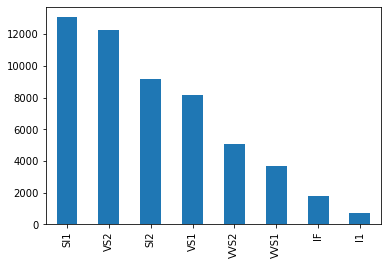

In [29]:
# BARPLOT for CLARITY
df['clarity'].value_counts().plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

# Bi-Variate Analysis on on Numerical- Numerical Variables:

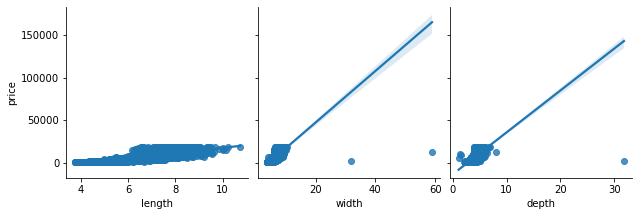

In [30]:
# Pairplot
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['length','width','depth'] , y_vars =  ['price'] , kind = 'reg')

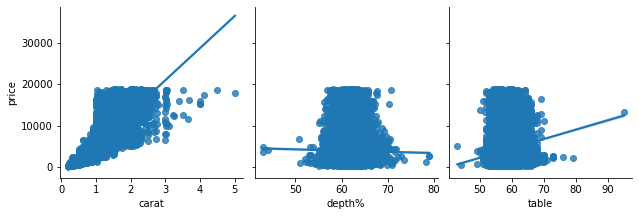

In [32]:
# Pairplot
sns.pairplot(df , height=3, aspect =1, x_vars = ['carat','depth%', 'table'] , y_vars =  ['price'] , kind = 'reg')

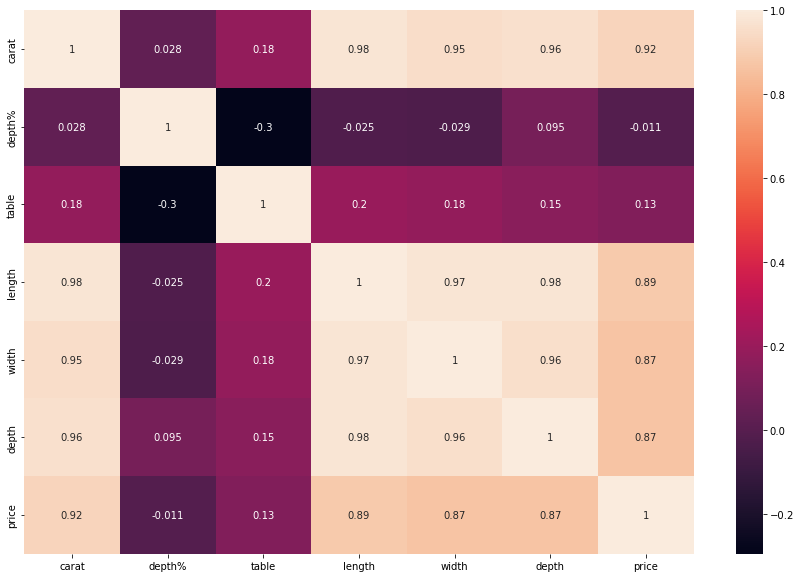

In [33]:
# Heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr , xticklabels=corr.columns , yticklabels=corr.columns , annot=True)

There is a high correlation between carat, length, width, depth and price.

# Bivariate Analysis on Categorical - Continous Variables:

<AxesSubplot:xlabel='cut'>

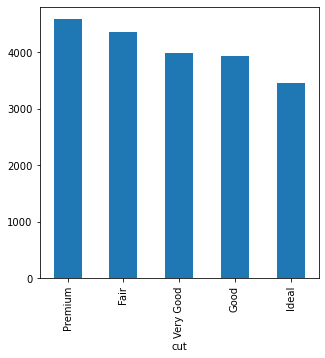

In [34]:
# BARPLOT for Cut and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('cut')['price'].mean().sort_values(ascending = False).plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

<AxesSubplot:xlabel='color'>

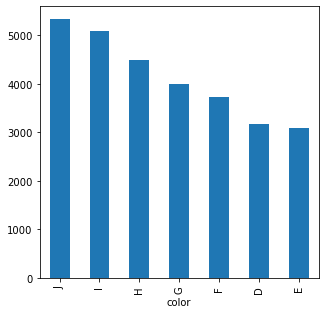

In [35]:
# BARPLOT for Color and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('color')['price'].mean().sort_values(ascending = False).plot.bar()

color : diamond colour, from J (worst) to D (best)

<AxesSubplot:xlabel='clarity'>

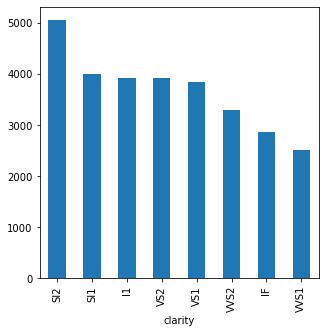

In [36]:
# BARPLOT for Clarity and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('clarity')['price'].mean().sort_values(ascending = False).plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

# Splitting the Target and Independent Columns

In [38]:
X = df[['carat', 'cut', 'color', 'clarity', 'length', 'width', 'depth']]  #.drop('price', axis = 1)

In [39]:
y = df[['price']]

In [40]:
X.head()

,carat,cut,color,clarity,length,width,depth
0,0.23,Ideal,E,SI2,3.95,3.98,2.43
1,0.21,Premium,E,SI1,3.89,3.84,2.31
2,0.23,Good,E,VS1,4.05,4.07,2.31
3,0.29,Premium,I,VS2,4.20,4.23,2.63
4,0.31,Good,J,SI2,4.34,4.35,2.75


In [41]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


# Splitting Data into Train and Test

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (40440, 7) (40440, 1)
Test Set:  (13480, 7) (13480, 1)


In [43]:
X_train.head(3)

,carat,cut,color,clarity,length,width,depth
42571,0.38,Premium,E,VVS1,4.66,4.62,2.87
20932,1.51,Very Good,E,SI2,7.30,7.35,4.48
3488,0.90,Good,I,VS2,6.06,6.13,3.81


In [44]:
X_test.head(3)

,carat,cut,color,clarity,length,width,depth
10219,1.00,Ideal,E,SI2,6.39,6.43,3.96
22845,1.51,Good,E,SI2,7.54,7.50,4.43
43017,0.50,Ideal,H,VS1,5.12,5.15,3.18


# Label Encoding

In [45]:
# Importing LabelEncoder Module
from sklearn.preprocessing import LabelEncoder

In [46]:
# label encoding the train set categorical columns
le = LabelEncoder()
X_train['cut']=le.fit_transform(X_train['cut'])
X_train['color']=le.fit_transform(X_train['color'])
X_train['clarity']=le.fit_transform(X_train['clarity'])

In [47]:
# label encoding the test set categorical columns
le= LabelEncoder()
X_test['cut']=le.fit_transform(X_test['cut'])
X_test['color']=le.fit_transform(X_test['color'])
X_test['clarity']=le.fit_transform(X_test['clarity'])

In [48]:
X_train.head(3)

,carat,cut,color,clarity,length,width,depth
42571,0.38,3,1,6,4.66,4.62,2.87
20932,1.51,4,1,3,7.30,7.35,4.48
3488,0.90,1,5,5,6.06,6.13,3.81


In [49]:
X_test.head(3)

,carat,cut,color,clarity,length,width,depth
10219,1.00,2,1,3,6.39,6.43,3.96
22845,1.51,1,1,3,7.54,7.50,4.43
43017,0.50,2,4,4,5.12,5.15,3.18


# Standardization

# Data Preprocessing on Training Data 

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                                columns = X_train.columns,
                                index = X_train.index)
X_train_rescaled.head()

,carat,cut,color,clarity,length,width,depth
42571,-0.878915,0.433608,-0.938711,1.249494,-0.955968,-0.974668,-0.948150
20932,1.492943,1.405944,-0.938711,-0.488110,1.396467,1.410026,1.326393
3488,0.212560,-1.511064,1.413702,0.670292,0.291536,0.344339,0.379844
11868,0.758297,-0.538728,1.413702,-1.067312,0.870733,0.885918,0.930820
27500,2.668378,-0.538728,0.825599,-0.488110,2.127147,2.056427,2.258814


# Data Preprocessing on Testing Data

In [51]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                               columns = X_test.columns,
                               index = X_test.index)
X_test_rescaled.head()

,carat,cut,color,clarity,length,width,depth
10219,0.422459,-0.538728,-0.938711,-0.488110,0.585590,0.606393,0.591758
22845,1.492943,-1.511064,-0.938711,-0.488110,1.610325,1.541053,1.255755
43017,-0.627036,-0.538728,0.825599,0.091091,-0.546074,-0.511706,-0.510195
35171,-1.025845,-0.538728,0.237495,-1.646513,-1.205468,-1.158106,-1.216575
1456,0.002661,-0.538728,-0.938711,-0.488110,0.238071,0.256987,0.182057


# Creating Models : 

# a) Linear Regression : 

In [52]:
#Importing LinearRegression from sklearn.linear_model module
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_rescaled, y_train)

LinearRegression()

In [53]:
# Make prediction on test set
y_test_pred = linear_regressor.predict(X_test_rescaled)

In [57]:
# Calculate Accuracy of predictions
from sklearn import metrics
print("R2 Score: " , metrics.r2_score(y_test, y_test_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 Score:  0.8857579759530438
Mean Absolute Error:  858.4829208917745
Mean Squared Error:  1765324.183625173
Root Mean Squared Error:  1328.6550280735678


# b) KNN Regression :

In [58]:
#Importing KNN regression from sklearn.neighbours module
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_rescaled, y_train)

KNeighborsRegressor()

In [59]:
# Make prediction on test set
y_test_pred = knn_regressor.predict(X_test_rescaled)

In [60]:
# Calculate Accuracy of predictions
from sklearn import metrics
print("R2 Score: " , metrics.r2_score(y_test, y_test_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 Score:  0.9749013095866292
Mean Absolute Error:  308.2487833827893
Mean Squared Error:  387837.3613709198
Root Mean Squared Error:  622.7658961206207


# Decision Tree Regression

In [61]:
# Importing Decision Tree Regression from sklearn.tree module
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_rescaled, y_train)

DecisionTreeRegressor()

In [62]:
# Make prediction on test set
y_test_pred = dt_regressor.predict(X_test_rescaled)

In [63]:
# Calculate Accuracy of predictions
from sklearn import metrics
print("R2 Score: " , metrics.r2_score(y_test, y_test_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 Score:  0.9656729170840936
Mean Absolute Error:  361.8820845697329
Mean Squared Error:  530439.0405394824
Root Mean Squared Error:  728.3124607882817


# Random Forest Regression

In [64]:
# Importing Random Forest Regression from sklearn.ensemble module
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_rescaled, y_train)

RandomForestRegressor()

In [65]:
# Make prediction on test set
y_test_pred = rf_regressor.predict(X_test_rescaled)

In [66]:
# Calculate Accuracy of predictions
from sklearn import metrics
print("R2 Score: ", metrics.r2_score(y_test, y_test_pred))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 Score:  0.9809438989445046
Mean Absolute Error:  272.34013922889875
Mean Squared Error:  294464.2859710208
Root Mean Squared Error:  542.6456357246603


Therefore, the accuracy of the Random Forest Regression model is higher compared to the other models.
But we will not be using Random Forest Regression Model due to the large file size. Instead we will use KNN Regression Model which gave the second best scores.

# Saving the Model (Serialization)

In [71]:
from pickle import dump

#dump(le_cut, open('models/label_encoder_cut.pkl', 'wb'))
#dump(le_color, open('models/label_encoder_color.pkl', 'wb'))
#dump(le_clarity, open('models/label_encoder_clarity.pkl', 'wb'))
dump(le, open('label_encoder.pkl', 'wb'))
dump(scaler, open('standard_scaler.pkl', 'wb'))
dump(linear_regressor, open('lr_model.pkl', 'wb'))
dump(knn_regressor, open('knn_model.pkl', 'wb'))
dump(dt_regressor, open('dt_model.pkl', 'wb'))
dump(rf_regressor, open('rf_model.pkl', 'wb'))

# Productionisation (Deserialization)

In [73]:
from pickle import load

#le_cut = load(open('models/label_encoder_cut.pkl', 'rb'))
#le_color = load(open('models/label_encoder_color.pkl', 'rb'))
#le_clarity = load(open('models/label_encoder_clarity.pkl', 'rb'))
le = load(open('label_encoder.pkl', 'rb'))
scaler = load(open('standard_scaler.pkl', 'rb'))
linear_regressor = load(open('lr_model.pkl', 'rb'))
knn_regressor = load(open('knn_model.pkl', 'rb'))
dt_regressor = load(open('dt_model.pkl', 'rb'))
rf_regressor = load(open('rf_model.pkl', 'rb'))

In [74]:
X.head(5)

,carat,cut,color,clarity,length,width,depth
0,0.23,Ideal,E,SI2,3.95,3.98,2.43
1,0.21,Premium,E,SI1,3.89,3.84,2.31
2,0.23,Good,E,VS1,4.05,4.07,2.31
3,0.29,Premium,I,VS2,4.20,4.23,2.63
4,0.31,Good,J,SI2,4.34,4.35,2.75


In [75]:
# Read the query data

print("Enter Diamond Details")

carat = float(input('Carat: '))
cut = input('Cut: ')
color = input('Color: ')
clarity = input('Clarity: ')
length = float(input('Length: '))
width = float(input('Width: '))
depth = float(input('Depth: '))

Enter Diamond Details
Carat: 0.22
Cut: Ideal
Color: E
Clarity: VS1
Length: 4
Width: 4
Depth: 3


In [76]:
label_cut = {'Ideal':2, 'Premium':3, 'Very Good':4, 'Good':1, 'Fair':0}
label_color = {'G':3, 'E':1, 'F':2, 'H':4, 'D':0, 'I':5, 'J':6}
label_clarity = {'SI1':2, 'VS2':5, 'SI2':3, 'VS1': 4, 'VVS2':7, 'VVS1':6, 'IF':1, 'I1':0}

In [77]:
cut_labelled = label_cut[cut]
color_labelled = label_color[color]
clarity_labelled = label_clarity[clarity]

In [78]:
label_clarity[clarity]

4

# Converting the Values to 2D Array

In [79]:
query_point = np.array([carat, cut_labelled, color_labelled, clarity_labelled, length, width, depth])

In [80]:
query_point

array([0.22, 2.  , 1.  , 4.  , 4.  , 4.  , 3.  ])

In [81]:
query_point.reshape(1, -1)

array([[0.22, 2.  , 1.  , 4.  , 4.  , 4.  , 3.  ]])

In [82]:
query_point = query_point.reshape(1, -1)
query_point

array([[0.22, 2.  , 1.  , 4.  , 4.  , 4.  , 3.  ]])

In [83]:
scaler.transform(query_point)

array([[-1.21475362, -0.53872814, -0.93871142,  0.09109102, -1.54407632,
        -1.51624721, -0.76449157]])

In [84]:
query_point_transformed = scaler.transform(query_point)
query_point_transformed

array([[-1.21475362, -0.53872814, -0.93871142,  0.09109102, -1.54407632,
        -1.51624721, -0.76449157]])

In [85]:
knn_regressor.predict(query_point_transformed)

array([[701.]])

In [86]:
rf_regressor.predict(query_point_transformed)

array([513.43])

In [87]:
dt_regressor.predict(query_point_transformed)

array([556.])

In [88]:
linear_regressor.predict(query_point_transformed)

array([[-242.09533175]])

# Production Ready Code